# 기술 통계란?
- **`수치 기술 통계`** : 숫자 형태로 데이터를 요약하는 방법<br> (**① 중심 위치 척도, ② 변동성 척도, ③ 연관성 척도**)<br><br>
- **`표와 그래프 기술통계`** : 표와 그래프 형태로 요약하는 방법, 즉 데이터 시각화<br> (도수분포표와 분할표, 막대그림과 파이그림, 히스토그램, 줄기-잎 전시, 상자 그림 등)<br>
=> Session 3에서 학습 

## 수치 기술 통계

- 자료의 기본 특성을 파악할 수 있는 척도로 ① 중심 위치, ② 변동성, ③ 연관성이 있음

- **다섯 수치 요약** (Five Number Summary)

      1 2 3 4 5

 -  최솟값 (minimum) : 1
 -  최댓값 (maximum) : 5
 -  중앙값 (median, 2nd quartile, Q2) : 3
 -  1사분위수 (1st quartile, Q1) : 2
 -  3사분위수 (3rd quartile, Q3) : 4

### 수치 기술 통계 - ① 중심 위치 척도

#### 평균 (mean) 
- 모든 자료의 값을 더한 후 전체 개수로 나눈 값<br>
- 이상치(outlier)와 측정 오차(measurement error)에 민감하게 반응함

#### 중앙값 (median)
- 자료를 크기 순으로 늘어 놓았을 때 가운데에 해당하는 값
    -  1) n이 홀수 : n+1/2번째 크기 순 자료
    -  2) n이 짝수 : 가운데 있는 두 개 값의 가운데 값 
    -  평균에 비하여 이상치와 측정 오차에 덜 민감하게 반응함 

#### 최빈값 (mode)
- 자료 중에서 그 빈도수가 최대인 값

In [1]:
from statistics import mean, median ,mode 
import numpy as np

np.random.seed(0)
x = (np.random.randint(20, size = 1000))

print("mean(x):", mean(x))

print("median(x):", median(x))

print("mode(x):", mode(x))

mean(x): 9
median(x): 9.0
mode(x): 3


**중심 위치 척도 응용**
- 평균, 중앙값, 최빈값을 통해 자료의 개형 (skewness 등) 확인 가능
- 자료의 개형은 이상치 여부 판단, 변수 변환 판단 등에 활용됨
- 자료의 꼬리가 긴 경우 자료의 개형이 두 개 이상의 봉우리를 가질 가능성이 커지게 됨

### 수치 기술 통계 - ② 변동성 척도
#### 사분위수(quartile)
- 데이터 표본을 4개의 동일한 부분으로 나눈 값 (n은 총 도수)
    - Q1 = 1+(n-1)x0.25
    - Q2 = 중앙값 
    - Q3 = 1+(n-1)x0.75

In [2]:
from statistics import quantiles
import numpy as np 

x=[1,2,3,4,5,6,7,8,9,10]
print('method를 inclusive로 했을 때:', quantiles(x, method = 'inclusive'))
print('method를 exclusive로 했을 때:', quantiles(x, method = 'exclusive'))

x=np.array([1,2,3,4,5,6,7,8,9,10])
print('numpy로 계산했을 때:', np.quantile(x, [0.25, 0.5, 0.75]))

#five number summary 
q=quantiles(x, n=4, method='inclusive')
print('다섯 범위를 확인할 때', min(x), q[0], q[1], q[2], max(x) )

method를 inclusive로 했을 때: [3.25, 5.5, 7.75]
method를 exclusive로 했을 때: [2.75, 5.5, 8.25]
numpy로 계산했을 때: [3.25 5.5  7.75]
다섯 범위를 확인할 때 1 3.25 5.5 7.75 10


#### 사분위간 범위 (IQR)
- 사분위간 범위 (Interquartile range, IQR) : Q3-Q1
- 범위가 같더라도 자료 양 끝단의 변동성이 다를 수 있음

In [3]:
import numpy as np 

x=np.array([1,2,3,4,5,6,7,8,9,10])

#x의 IQR

q = np.quantile(x, [0.25, 0.5, 0.75])
q[2]-q[0]

4.5

#### 범위 (range) 
- 최댓값 - 최솟값
- 범위가 같더라도 자료의 변동성은 상이할 수 있음

In [4]:
#x의 range 

x=[1,2,3,4,5,6,7,8,9,10]
max(x)-min(x) 

9

#### 분산 (variance)
- 자료 각각이 평균으로부터 떨어져 있는 정도

#### 표준편차 (standard deviation)
- 분산의 제곱근

#### 변동 계수 (coefficient of variation)
- 표준편차를 평균에 대한 상대적인 값으로 표현 
- 변동 계수(%) = 표준편차/평균 * 100 

In [5]:
#분산, 표준편차, 변동 계수 예제 

from statistics import variance, stdev, mean

x=[1,2,3,4,5,6,7,8,9,10]

print('분산 :',variance(x))
print('표준편차 :',stdev(x))
print('변동 계수 :', (stdev(x) / mean(x))*100)

분산 : 9.166666666666666
표준편차 : 3.0276503540974917
변동 계수 : 55.04818825631803


### 수치 기술 통계 - ③ 연관성 척도
#### 공분산 (covariance) 
- 두 변수가 각자의 평균으로부터 떨어진 값을 서로 곱한 후 평균 낸 값, 두 변수가 어느 방향으로 얼마나 변동하는지 나타냄

#### 상관계수 (correlation)
- 공분산을 각 변수의 변동성(표준편차)을 이용하여 표준화 한 값. -1과 1사이의 값을 가짐<br><br>
- **상관관계 != 인과관계**

In [6]:
import pandas as pd
iris = pd.read_csv('./iris.csv',encoding = 'cp949') # 파일위치에 맞게 불러오기 
iris.head(5)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종류
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# 분산 공분산 표
iris.cov()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
꽃받침길이,0.685694,-0.042434,1.274315,0.516271
꽃받침너비,-0.042434,0.189979,-0.329656,-0.121639
꽃잎길이,1.274315,-0.329656,3.116278,1.295609
꽃잎너비,0.516271,-0.121639,1.295609,0.581006


In [8]:
#꽃받침길이와 꽃받침너비의 공분산
iris.cov().iloc[:2,:2]

,꽃받침길이,꽃받침너비
꽃받침길이,0.685694,-0.042434
꽃받침너비,-0.042434,0.189979


In [9]:
# 상관계수 표
iris.corr()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
꽃받침길이,1.000000,-0.117570,0.871754,0.817941
꽃받침너비,-0.117570,1.000000,-0.428440,-0.366126
꽃잎길이,0.871754,-0.428440,1.000000,0.962865
꽃잎너비,0.817941,-0.366126,0.962865,1.000000


In [10]:
#꽃받침길이와 꽃받침너비의 상관계수
x = iris['꽃받침길이']
y = iris['꽃받침너비']
x.corr(y)  # Pearson correlation

-0.11756978413300208

#### 기타 상관 계수

- **파이 계수** (phi coefficient) 
   - 두 변수가 명목형일 때 적용되는 상관계수
   - Pearson의 상관 계수와 동일하게 해석<br><br>
- **스피어만 상관계수** (Spearman correlation) 
   - 두 변수 관측값의 순위 (rank)를 이용한 상관계수
   - 순위에 대한 Pearson 상관계수<br><br>
- **점-양분 상관계수** (point-biserial correlation) 
   - 하나의 변수는 숫자형이고 하나는 명목형인 경우에 적용
   - 명목형 변수의 범주가 2개인 경우 Pearson 상관계수처럼 계산 가능

# 사이킷런

## 사이킷런이란?
**`사이킷런`**: 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리

https://scikit-learn.org/stable/index.html

In [11]:
# 설치되어있는 사이킷런 버전 확인하기

import sklearn

print(sklearn.__version__)

0.24.2


## 데이터 분석 프로세스
1. **데이터 세트 선택 및 전처리**: 데이터를 수집하고, 이상치 등을 제거
2. **데이터 분리**: 학습용 데이터와 검증용 데이터로 분리
3. **모델 학습**: 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킴
4. **예측 수행**: 학습된 머신러닝 모델을 통해 테스트 데이터 결과를 예측
5. **평가**: 예측된 결괏값과 실제 결괏값을 비교해 모델 성능을 평가

## 사이킷런 주요 모듈

아래와 같이 다양한 기능을 제공합니다. 





### 예제 데이터
- sklearn.datasets

#### 예제 데이터의 구조
- 파이썬 dictionary 형태로 구성되어 있음
- data, target, target_name, feature_names, DESCR의 키로 구성되어 있음
- data: 독립변수의 데이터 세트
- target: 종속변수 데이터 세트
- target_names: 종속변수의 값
- feature_names: 독립변수의 이름
- DESCR: 데이터 세트에 대한 설명과 각 피처의 설명


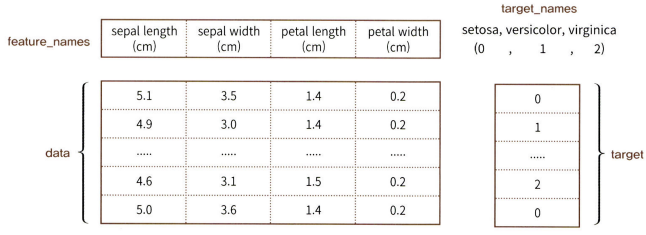

### 피처 처리
- sklearn.preprocessing
- sklearn.feature_selection
- sklearrn.featrue_extraction

### 피처 처리 & 차원 축소
- sklearn.decomposition


### 데이터 분리 및 검증, 파라미터 튜닝
- sklearn.model_selection

In [12]:
# 학습용, 검증용 데이터 분리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

print("iris 독립변수 개수:", iris_data.data.shape)
print("iris 종속변수 개수:", iris_data.target.shape)
print('======================================')
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 121)

print("Iris 학습용 독립변수 개수:", X_train.shape)
print("iris 학습용 종속변수 개수:", y_train.shape)

print("Iris 검증용 독립변수 개수:", X_test.shape)
print("iris 검증용 종속변수 개수:", y_test.shape)

iris 독립변수 개수: (150, 4)
iris 종속변수 개수: (150,)
Iris 학습용 독립변수 개수: (105, 4)
iris 학습용 종속변수 개수: (105,)
Iris 검증용 독립변수 개수: (45, 4)
iris 검증용 종속변수 개수: (45,)


### 평가
- sklearn.metrics

#### 여러 평가 지표

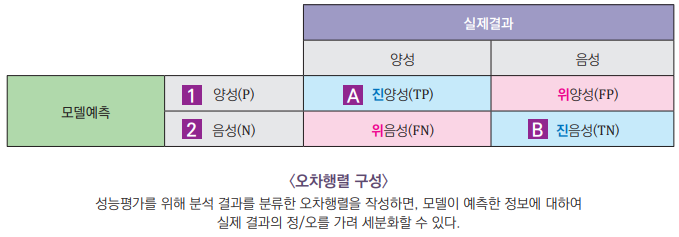

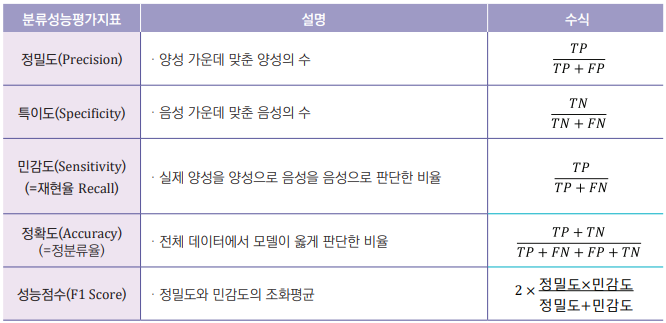

### ML 알고리즘
- sklearn.linear_model
- sklearn.tree


### 유틸리티
- skelran.pipeline

  사이킷런에는 여러 함수가 있고, 각 함수마다 파라미터 등 다양하게 입력할 수 있기 때문에, [공식문서 참고하기!!](https://scikit-learn.org/stable/user_guide.html)

#회귀분석

## 회귀분석 개념

### 정의

회귀(Regression)란, 독립변수 X와 종속변수 y 두 변수 간의 관계를 분석하는 통계적 방법

__회귀__는 잔차(residual: 회귀식에서 오차항에 대한 관측치)가 평균으로 회귀하는 것을 의미\
__회귀 모델__은 잔차가 평균(대개 0)으로 회귀하도록 만든 모델\
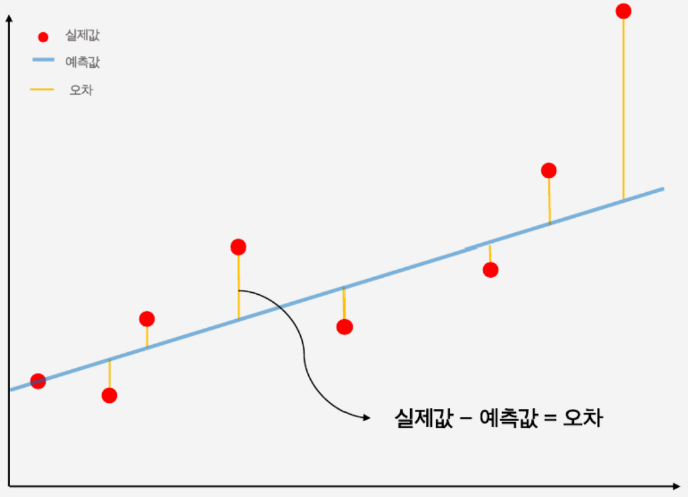

실제값과 예측값의 차이를 줄여 좋은 모델을 만들고자 한다\
→ 최적의 회귀 모델: 실제값과 회귀모델의 차이에 따른 오류값, 즉 잔차 제곱합이 최소가 되는 모델

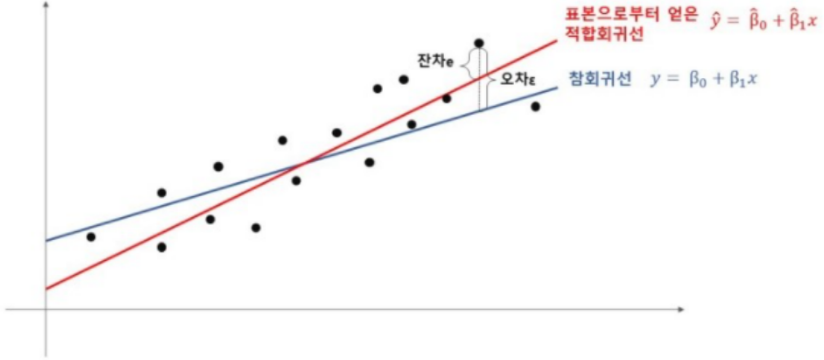

**잔차와 오차의 차이**
   1. 오차: **모집단**으로부터 추정한 회귀식으로 얻은 예측값과 실제 관측값의 차이
   2. 잔차: **표본**으로부터 추정한 회귀식으로 얻은 예측값과 실제 관측값의 차이

 => 보통 모집단 데이터 전부를 사용하는 경우는 별로 없기 때문에 **잔차**를 기준으로 회귀식의 최적 회귀계수 추정

### 목적

- 데이터 해석
    1. 모형적합도 : 모형이 데이터에 얼마나 잘 맞는가?</br>
ex) 식사량과 체중의 관계가 데이터에 잘 맞는지 검증해볼 수 있다
    2. 회귀계수 : 독립변수의 변화가 종속변수를 얼마나 변화시키는가?</br>
ex) 식사량이 증가하면 체중이 얼마나 증가하는지 알 수 있다
---
- 예측<br>
    - __Train데이터__의 __학습__을 통해 __Test데이터__에 대한 예측을 할 수 있다.
    - __Train data__ : 사용가능한 데이터중, 회귀모델을 설정하기 위해 __데이터를 학습__시키는데 사용되는 데이터
    - __Test data__ : Train data를 이용한 학습을 통해 설정된 회귀선의 __설명력을 확인__하기 위해 사용되는 데이터    

### 기본가정

**회귀분석의 4가지 기본가정** (회귀모형이 적절한가)
- **선형성** : 를 가진다.

- **독립성** : 독립변수 간 상관관계가 적다.

- **잔차의 등분산성(동분산성)** : 잔차가 특정한 패턴을 보이지 않는다. (점점 커지거나 작아지거나 하는 패턴이 없다.)

- **잔차의 정규성** : 잔차가 정규분포이다. <br>
===> 이 4가지가 모델적정성 평가에 활용된다

**회귀모형의 가정 확인해아하는 이유**<br>
: 가정이 위배될 경우 제1종오류(거짓으로 유의한 결과가 나오는 오류)가 증가할 수 있으며, 분석 결과를 신뢰할 수 없게 됨

####  모형의 선형성

**독립변수와 종속변수 간의 관계 분포가 선형의 관계**
- 중요한 독립변수가 누락되지 않았는지 파악

데이터 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('./advertising.csv')

In [14]:
# 선형회귀 분석- 사이킷런의 LinearRegression()을 사용

from sklearn.linear_model import LinearRegression

data_slr = data[['TV','Sales']]

X = data_slr['TV']
y = data_slr['Sales']

# 회귀분석 모형 생성
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

__모형구성에 대한 가정__(선형성)

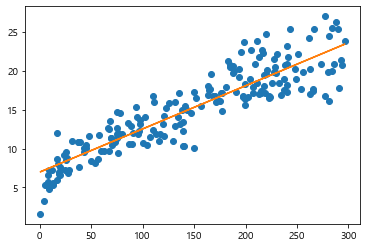

In [15]:
# 기존 X값을 이용하여 y를 예측하게 한 그래프 (line_fitter.predict())

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

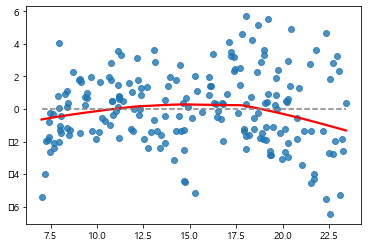

In [16]:
# 예측값과 잔차의 비교 - 모든 예측값에서 비슷한 잔차가 있어야 함

from statsmodels.formula.api import ols

model = ols('Sales ~ TV', data=data_slr)
result = model.fit()

fitted = result.predict(data_slr)
residual = data_slr['Sales'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

# 빨간 실선(실제 갖고 있는 잔차의 추세)과 일관된 잔차의 추세(점선)을 비교
# 과도하게 벗어나면 예측값에 따라 잔차가 크게 달라진다는 것

#### 잔차의 정규성

__측정오차에 대한 가정__

잔차에 대한 평균이 0이 되지 않고 어떤 바이어스가 존재하는 문제점 -> 특이값(극단값) 존재여부 확인

In [17]:
# 회귀분석 실시 - statemodels 사용

from statsmodels.formula.api import ols

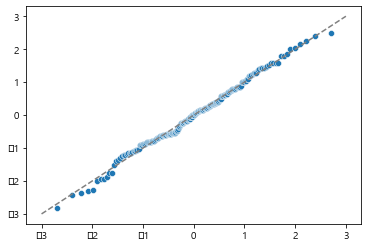

In [18]:
# 잔차가 정규분포를 따른다는 가정
# Q-Q 플롯으로 확인할 수 있음
# 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치되어 있어야 함

import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [19]:
# 샤피로검정으로도 확인 가능
# 검정통계치, p-value

scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9934908747673035, pvalue=0.5269260406494141)

__Outlier 제거__

In [20]:
# Cook's distance는 극단값을 나타내는 지표

from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(result).cooks_distance

cd.sort_values(ascending=False).head()

# 아래 나와있는 값들이 예측에서 많이 벗어남을 알 수 있음.

150    0.070057
130    0.056697
35     0.052781
178    0.049224
175    0.035239
dtype: float64

#### 잔차의 등분산성
편향되지 않고 일정하게 분포하는지

<AxesSubplot:>

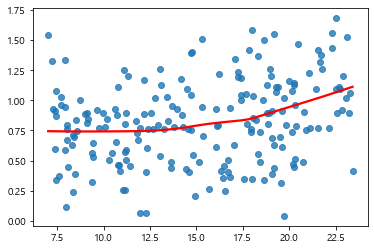

In [21]:
# 회귀모형을 통햬 예측된 모든 값들에 대하여 잔차의 분산이 동일하다는 가정

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

#### 잔차의 독립성

- ols 회귀분석 summary에서 얻은 더빈왓슨 검정 참고 가능<br>

**++ 잔차 분석 결과에 따라 다양한 방식의 대응이 가능<br>**
- 극단값을 제거
- 독립변수 추가
- 종속변수를 수학적으로 변환

**회귀모형의 가정 확인해야 하는 이유**<br>
: 가정이 위배될 경우 제 1종 오류(거짓으로 유의한 결과가 나오는 오류)가 증가할 수 있으며, 분석 결과를 신뢰할 수 없게 됨

## 선형 회귀분석

주어진 데이터를 **대표**하는 **하나의 직선**을 찾는 것.\
이 직선을 **회귀선**이라고 부르고 이 선을 함수로 표현한 것을 **회귀식**이라고 부른다.\
(단순선형회귀분석에서는 **y = wx + b**의 형태로 나타남.)

- 여기서 x의 계수 w는 가중치값(coef; coefficient), b는 절편(intercept)라고 부른다.

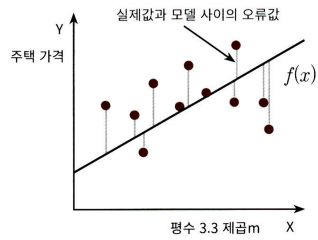

선형회귀식 예시 \
**Y = W1 * X1 + W2 * X2 + W3 * X3 +...+ Wn * Xn**

Y = 종속변수(아파트 가격)

X = 독립변수(방 개수, 면적, 거리 등)

W = 독립변수의 값에 영향을 미치는 회귀 계수 (Regression coefficients)

+ 머신러닝 관점에서 보면 독립변수는 (Feature), 종속변수는 결정 값(Target) <br>
머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

 **잔차의 제곱의 합이 최소가 되도록 하는 직선을 회귀선으로 함으로써 최적 회귀계수 추정**

### 경사하강법

=> 주로 **평균제곱오차(MSE)**가 가장 적을 때 대표한다고 표현

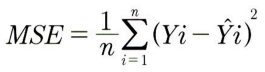

- 이러한 평균제곱오차를 **비용함수**라고 부른다.         (y는 실제값, y햇은 예측값)

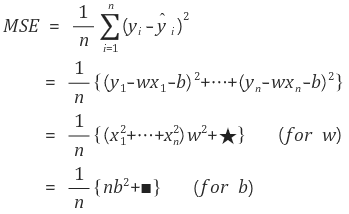

즉 실제값과 예측값의 차이를 최소화시키는(MSE를 가장 작게 만드는) w와 b를 찾으려는 것

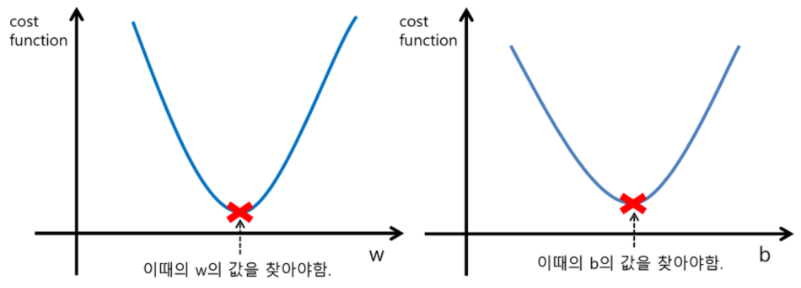

- 최적의 w값(회귀계수값)을 찾아가기 위해 비용함수를 회귀계수 w에 대해서 편미분해준 것에 학습률(learning rate)이라고 불리는 파라미터를 곱한 것을 초기 설정된 w값에서 빼준다. (절편 b도 마찬가지)


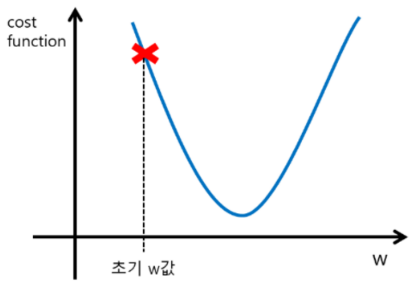

- 학습률이 크면 듬성듬성, 시간은 빠르지만 정확도 낮아짐, 최적의 지점을 건너뛰어 버리고 발산할 가능성
- 학습률이 너무 작으면 최적의 w를 찾아가는데 너무 오래 걸릴 가능성이 큼

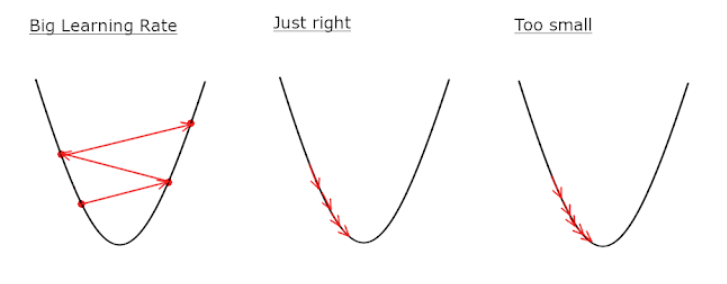

=> 접선의 기울기의 값이 0이 될 때 최적의 w와 b값을 구할 수 있다.

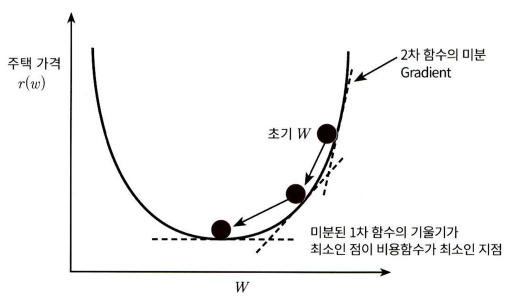

### 최소제곱법(OLS)

잔차를 최소화시키는 방법으로 회귀계수(w,b)를 추정하는 기법

$$\epsilon_i=y_i-b-wx_i$$

**위 식(잔차)의 제곱의 합이 최소**가 되는 회귀계수 b,w를 찾는 것이 목적


$$Min S^2 = Min \sum_{i=1}^{n}\epsilon_i^2 = Min \sum_{i=1}^{n}(y_i-b-wx_i)^2  $$
이 식을 최소화시키는 회귀계수 w, b를 찾기 위해 

$$f'(x)=0$$
$$f''(x) > 0$$

다음 식의 해를 풀면, 최소제곱법을 이용해 w, b을 추정한 최적 회귀계수가 되는 것

- 참고: https://laoonlee.tistory.com/14

### 비교: 경사하강법(Gradient Descent) vs 최소제곱법(Ordinary Least Square; OLS)

- 공통점 : 두 방식 모두, 목적이 MSE를 최소화하는데에 있다는 부분은 공통적이다.<br>
<br>
- 차이점
    1. 최소제곱법 : 미분계수를 이용해 한번에 미분계수값이 '0'이 되는 지점(최소값을 갖는 지점)을 구하는 방법
    2. 경사하강법 : 미분계수를 이용해 x값을 조정해나가면서 미분계수값이 '0'이 되는 지점(최소값을 갖는 지점)을 구하는 방법<br>
<br>

    참고 : https://sdsf1225.tistory.com/12

## 단순 선형 회귀분석(Simple Linear Regression) - 독립변수가 한 개

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
data = pd.read_csv('./advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


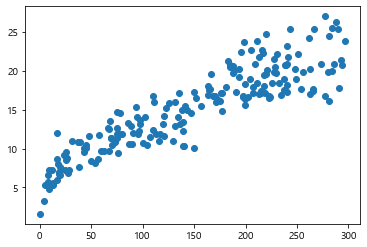

In [24]:
# 단순선형회귀분석이니 독립변수 TV만 사용 (tv와 sales간의 관계)

data_slr = data[['TV','Sales']]
plt.plot(data_slr['TV'], data_slr['Sales'], 'o')

**OLS(최소제곱법) 회귀분석**

In [25]:
#회귀분석 실시 - statemodels 사용

from statsmodels.formula.api import ols

In [26]:
# ols 함수로 회귀분석을 실시
# 종속변수 ~ 독립변수의 형태로 모형식을 쓴다. (y = f(x)처럼 종속변수를 왼쪽에, 독립변수를 오른쪽에 쓰는 것이 관습)

model = ols('Sales ~ TV', data=data_slr)
result = model.fit()

In [27]:
# 결과는 .summary() 메소드로 확인할 수 있다.

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           7.93e-74
Time:                        19:08:27   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 유의성/적합도 검증

#### 모형 유의성 검정 : F검증 (분산분석)

- 모형의 유의성은 F검정에 기반하여 이루어짐(분산의 분해): MSE/MSR로 F-statistic 계산, F 분포에서 유의수준 기준 검정


- **모형 유의성 검정의 영가설(H0): (모집단에서) 독립변수의 기울기가 0이다.(=독립변수가 영향이 없다)**

- **모형 유의성 검정의 대립가설(H1): (모집단에서) 독립변수의 기울기는 0과 다르다.(=독립변수가 영향이 있다)**


- __F-statistic: 856.2, Prob(F-statistic)__: 7.93e-74<br>
회귀모형에 대한 (통계적) 유의성 검정 결과, 유의수준 5%에서 유의함 *(p < 0.05)*<br>
즉, 모집단에서 독립변수는 종속변수에 유의미한 영향을 끼침.==> 영가설 기각<br>

#### 회귀계수: T검정 (두집단의 평균 비교)

- 회귀계수(기울기)의 유의성 검정은 T검정에 기반하여 이루어짐: 추정치/표준오차로 T-statistic 계산, T 분포에서 유의수준 기준 검정


- **회귀계수 유의성 검정의 영가설(H0): (모집단에서) 독립변수는 종속변수를 예측하지 못한다.**

- **회귀계수 유의성 검정의 대립가설(H1): (모집단에서) 독립변수는 종속변수를 예측할 수 있다.**


※ **단순회귀분석의 경우 모형 유의성 검정 결과와 회귀계수 유의성 검정 결과가 항상 일치한다.(F검정과 결과 동일)**

- __P>|t| (유의확률)__<br>
독립변수의 유의확률이다. 보통 독립변수가 95%의 신뢰도를 가져야 유의미하다고 판단한다.<br>
이 경우 독립변수의 유의확률은 0.05보다 작은 값이 산출된다. 즉, 독립변수의 유의확률이 0.05보다 작으면, 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 본다. 위 경우 TV의 유의확률은 0이다. 따라서 TV는 Sales에 유의미하게 영향을 미친다고 할 수 있다.<br>


- __Coef__<br>
Coef는 데이터로부터 얻은 계수의 추정치를 말한다.<br>
<br>
- __Intercept__<br>
절편(Intercept)의 추정치는 6.9748로, TV 광고시간이 0일 때 Sales의 값이다.<br>
TV의 계수 추정치는 0.0555로 TV 광고시간이 1 증가할 때마다 Sales가 0.0555 증가한다는 것을 의미한다.<br>

**=> y = 0.0555x + 6.9748**

- 절편 제거(참고만, 무턱대고 제거하면 안됨)<br>
__※ 단, 절편이 -값일 때 말이 안되는 경우 
ex) y = ax - 3 인데 y가 거리 등을 나타내는 경우
모형에서 절편 제거 가능!__

In [28]:
# 절편의 제거

from statsmodels.formula.api import ols

res = ols('Sales ~ 0 + TV', data_slr).fit() # 모형식에 '0+'를 추가하여 모형에서 절편을 제거할 수 있다
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              2714.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                   6.42e-118
Time:                        19:08:27   Log-Likelihood:                         -570.23
No. Observations:                 200   AIC:                                      1142.
Df Residuals:                     199   BIC:                                      1146.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0909      0.002     52.092      0.000       0.087       0.094
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.081
Skew:                          -0.540   Prob(JB):                      0.00647
Kurtosis:                       2.792   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 모형의 적합도

모형이 데이터에 잘 맞는 정도를 보여주는 지표들이다.
<br>
- __R-squared__: 0.812<br>
R제곱, 결정계수<br>
모형 적합도(혹은 설명력)<br>
Sales(종속변수)를 TV(독립변수)가 약 81%를 설명한다<br>
각 사례마다 TV에 차이가 있다.<br>
<br>참고 : https://mindscale.kr/course/basic-stat-python/11/<br>
<br>
- __Adj. R-squared__: 0.811<br>
독립변수가 여러 개인 다중회귀분석에서 사용<br>
(독립변수의 수가 늘어나게되면, R-Squared는 높아질 수 밖에 없기 때문)<br>
독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정<br>
서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다.<br>
<br>
- __로그 우도__(가능도, log likelihood): 종속변수가 정규분포라 가정했을 때 그 우도<br>
모형 내 추정하고자 하는 가장 적합한 모수들로 이루어진 모형임을 보여주는 값 (모형의 적합도 의미)<br>
로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다. (작을 수록 좋다)<br>
<br>
- __AIC, BIC__<br>
로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)<br>
<br>

#### 추가설명(참고만)

- Durbin-Watson(더빈왓슨, DW검정)의 값: 2.029<br>
DW검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다. 보통 1.5 ~ 2.5사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW검정값이 0 또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고, 이는 t값, F값, R제곱을 실제보다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.<br>
<br>
- No.observations: 200 <br>
즉 200개의 데이터 쌍을 가지고 회귀분석을 실시하였다는 것을 알 수 있다.<br>
<br>
- Df Model: 1 <br>
Df Model은 회귀분석의 "예측변수의 숫자(k)"를 의미한다. 회귀분석의 전체 파라미터는 1개의 종속변수를 포함하므로 Df Model은 다른 식으로는 "회귀분석 전체 파라미터 숫자 - 1" 이다. 예시 회귀모형에서 예측변수는 "TV" 1개이므로 Df Model은 1이 된다. <br>
<br>
- Df Residuals: 198 <br>
Df Residuals는 "No.observations - (Df Model + 1)"로 산출한다. 즉 전체 관찰데이터의 수에서 회귀모형의 전체 파라미터의 수를 뺀 값이다.

### 예측

In [29]:
# 선형회귀 분석- 사이킷런의 LinearRegression()을 사용

from sklearn.linear_model import LinearRegression

X = data_slr['TV']
y = data_slr['Sales']

#회귀분석 모형 생성
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

여기서 주의해야 할 점은 X데이터를 넣을 때 **.values.reshape(-1,1)** 를 썼다는 것이다. <br>
이는 X가 2차원 array 형태여야 하기 때문이다.<br>
[[x1], [x2], [x3], ... , [xn]].

- reshape는 행렬을 재정렬하는 것이다. (아래 그림 참고)

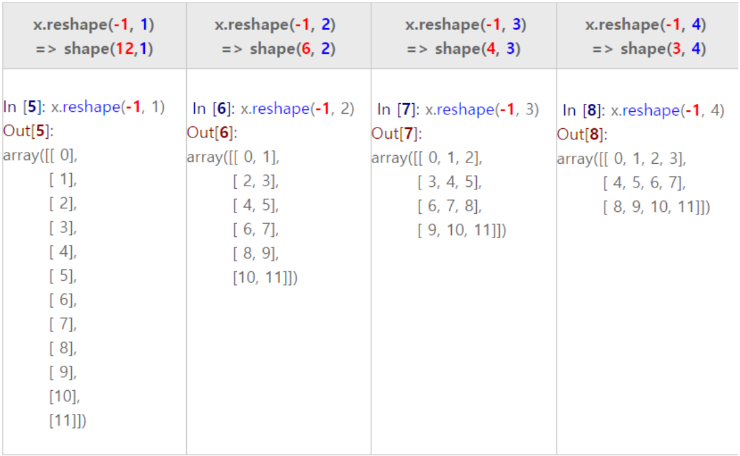

In [30]:
#예측해보기

line_fitter.predict([[70]])

array([10.85735542])

In [31]:
#회귀계수 (기울기) & 절편

print(line_fitter.coef_, line_fitter.intercept_)

[0.05546477] 6.9748214882298925


### 시각화(Plotting)

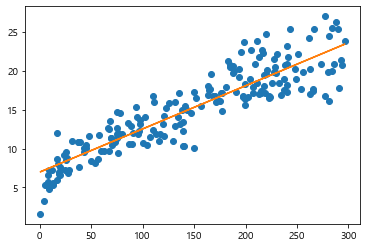

In [32]:
# 기존 X값을 이용하여 y를 예측하게 한 그래프 (line_fitter.predict())

plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()